In [24]:
# !pip install ffmpeg-python

In [25]:
import ffmpeg

In [26]:
from IPython.display import HTML

In [27]:
import matplotlib.animation as animation

animation.writers['ffmpeg']


matplotlib.animation.FFMpegWriter

In [28]:
import matplotlib.pyplot as plt
import numpy as np

import matplotlib.animation as animation

In [20]:
z

array([ 0.        ,  0.89405325,  1.73005917,  2.50801775,  3.22792899,
        3.8897929 ,  4.49360947,  5.0393787 ,  5.52710059,  5.95677515,
        6.32840237,  6.64198225,  6.89751479,  7.095     ,  7.23443787,
        7.3158284 ,  7.3391716 ,  7.30446746,  7.21171598,  7.06091716,
        6.85207101,  6.58517751,  6.26023669,  5.87724852,  5.43621302,
        4.93713018,  4.38      ,  3.76482249,  3.09159763,  2.36032544,
        1.57100592,  0.72363905, -0.18177515, -1.14523669, -2.16674556,
       -3.24630178, -4.38390533, -5.57955621, -6.83325444, -8.145     ])

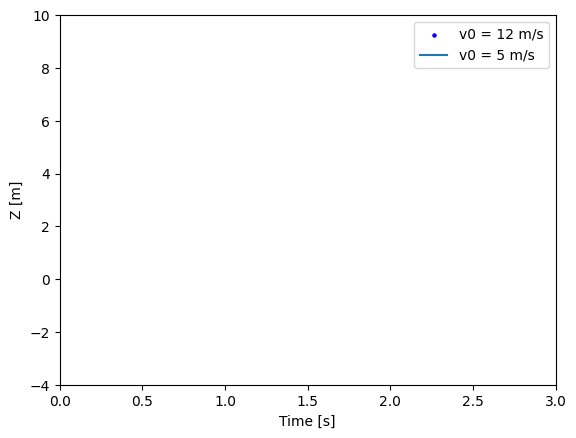

In [22]:
fig, ax = plt.subplots()
t = np.linspace(0, 3, 40)
g = -9.81
v0 = 12
z = g * t**2 / 2 + v0 * t

v02 = 5
z2 = g * t**2 / 2 + v02 * t

scat = ax.scatter(t[0], z[0], c="b", s=5, label=f'v0 = {v0} m/s')
line2 = ax.plot(t[0], z2[0], label=f'v0 = {v02} m/s')[0]
ax.set(xlim=[0, 3], ylim=[-4, 10], xlabel='Time [s]', ylabel='Z [m]')
ax.legend()


def update(frame):
    # for each frame, update the data stored on each artist.
    x = t[:frame]
    y = z[:frame]
    # update the scatter plot:
    data = np.stack([x, y]).T
    scat.set_offsets(data)
    # update the line plot:
    line2.set_xdata(t[:frame])
    line2.set_ydata(z2[:frame])
    return (scat, line2)


ani = animation.FuncAnimation(fig=fig, func=update, frames=40, interval=30)


HTML(ani.to_html5_video())


In [18]:
ani.save("motion.mp4", writer="ffmpeg")


In [31]:
x=np.linspace(0,30)
y=np.sin(x)

In [32]:
x

array([ 0.        ,  0.6122449 ,  1.2244898 ,  1.83673469,  2.44897959,
        3.06122449,  3.67346939,  4.28571429,  4.89795918,  5.51020408,
        6.12244898,  6.73469388,  7.34693878,  7.95918367,  8.57142857,
        9.18367347,  9.79591837, 10.40816327, 11.02040816, 11.63265306,
       12.24489796, 12.85714286, 13.46938776, 14.08163265, 14.69387755,
       15.30612245, 15.91836735, 16.53061224, 17.14285714, 17.75510204,
       18.36734694, 18.97959184, 19.59183673, 20.20408163, 20.81632653,
       21.42857143, 22.04081633, 22.65306122, 23.26530612, 23.87755102,
       24.48979592, 25.10204082, 25.71428571, 26.32653061, 26.93877551,
       27.55102041, 28.16326531, 28.7755102 , 29.3877551 , 30.        ])

In [33]:
y

array([ 0.        ,  0.57470604,  0.94063279,  0.96484631,  0.63855032,
        0.08028167, -0.50715171, -0.91034694, -0.9828312 , -0.6982724 ,
       -0.16004509,  0.43632343,  0.8741843 ,  0.99447137,  0.75348673,
        0.23877532, -0.36267843, -0.8323783 , -0.99969166, -0.80383688,
       -0.31596412,  0.28669214,  0.78519883,  0.99845837,  0.8489978 ,
        0.39111319, -0.20885508, -0.73295045, -0.99077947, -0.88867797,
       -0.4637374 ,  0.12966975,  0.67597047,  0.97670452,  0.92262121,
        0.53336793, -0.04964733, -0.61462671, -0.9563244 , -0.95060842,
       -0.59955527, -0.03069559,  0.54931519,  0.92977066,  0.97245891,
        0.66187214,  0.11084036, -0.48045753, -0.89721473, -0.98803162])

MovieWriter imagemagick unavailable; using Pillow instead.


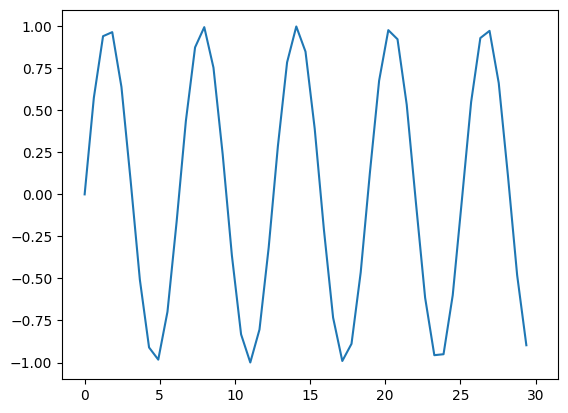

In [37]:
fig,ax=plt.subplots()
line,=ax.plot(x,y)
def update(num,x,y,line):
    line.set_data(x[:num],y[:num])
    return line,
ani=animation.FuncAnimation(fig, update, len(x),interval=100,fargs=[x,y,line],blit=True)
ani.save('ani.gif',writer='imagemagick',fps=60)